# Synthetic Data Analysis and Classification Model

## 1. Load Data and Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
df = pd.read_csv('synthetic_data.csv')

df.head()

,Age,Income,Education,HoursWorked,Purchase
0,56,65,1,48,1
1,46,41,1,45,0
2,32,62,0,45,0
3,60,33,0,40,1
4,25,57,2,40,0


## 2. Exploratory Data Analysis (EDA)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Age          1000 non-null   int64
 1   Income       1000 non-null   int64
 2   Education    1000 non-null   int64
 3   HoursWorked  1000 non-null   int64
 4   Purchase     1000 non-null   int64
dtypes: int64(5)
memory usage: 39.2 KB


In [3]:
df.describe()

,Age,Income,Education,HoursWorked,Purchase
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,40.986000,50.776000,1.109000,39.466000,0.50000
std,13.497852,14.839813,0.948693,10.016445,0.50025
min,18.000000,15.000000,0.000000,10.000000,0.00000
25%,29.000000,41.000000,0.000000,32.000000,0.00000
50%,42.000000,51.000000,1.000000,40.000000,0.50000
75%,52.000000,60.000000,2.000000,46.000000,1.00000
max,64.000000,89.000000,3.000000,79.000000,1.00000


### Target Variable Distribution

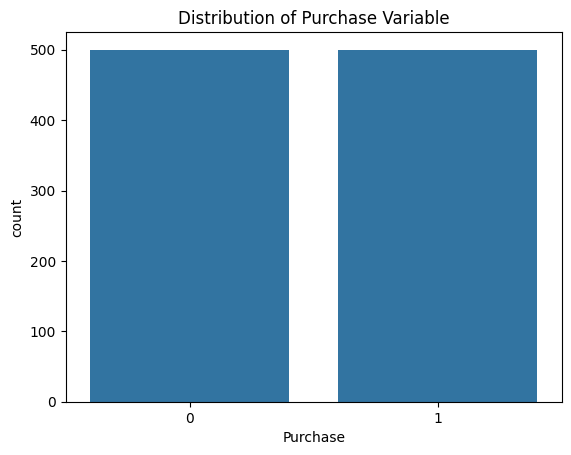

In [4]:
sns.countplot(x='Purchase', data=df)
plt.title('Distribution of Purchase Variable')
plt.show()

### Feature Distributions

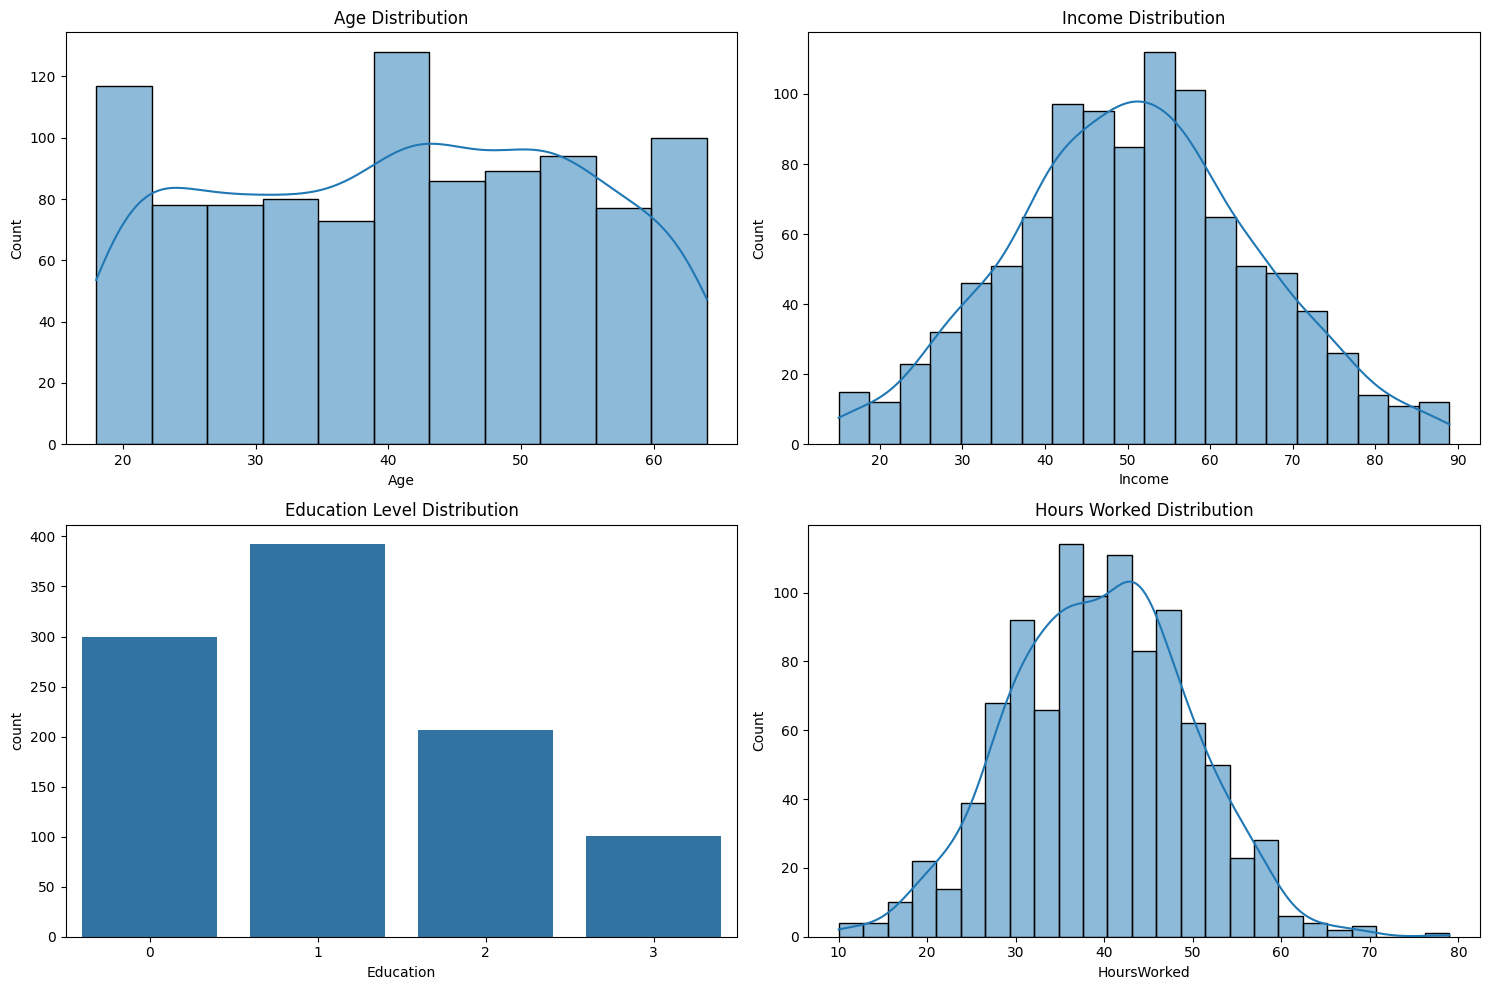

In [5]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.histplot(df['Age'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')

sns.histplot(df['Income'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Income Distribution')

sns.countplot(x='Education', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Education Level Distribution')

sns.histplot(df['HoursWorked'], kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Hours Worked Distribution')

plt.tight_layout()
plt.show()

### Correlation Matrix

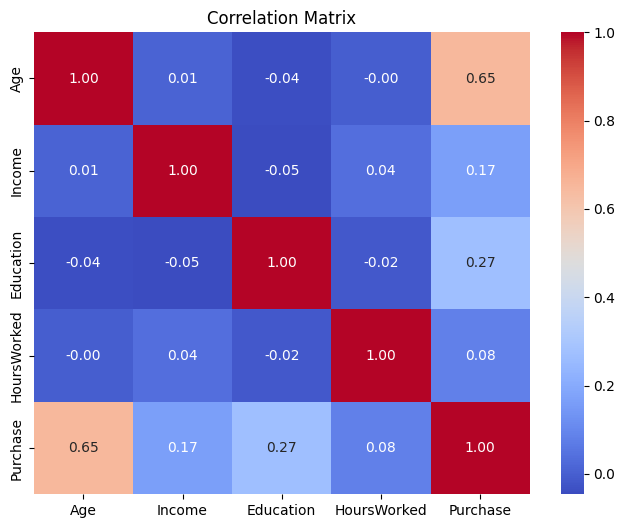

In [6]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

## 3. Feature Engineering (Minimal for this example)

In [7]:
# No explicit feature engineering for this simple example.
# Education is already numerical. If it were categorical strings, we'd encode it.

## 4. Model Training

In [8]:
X = df.drop('Purchase', axis=1)
y = df['Purchase']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [9]:
print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training set shape: X_train=(800, 4), y_train=(800,)
Test set shape: X_test=(200, 4), y_test=(200,)


In [10]:
# Initialize and train the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


## 5. Model Evaluation

In [11]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8300


In [12]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.82      0.83       100
           1       0.82      0.84      0.83       100

    accuracy                           0.83       200
   macro avg       0.83      0.83      0.83       200
weighted avg       0.83      0.83      0.83       200




Confusion Matrix:


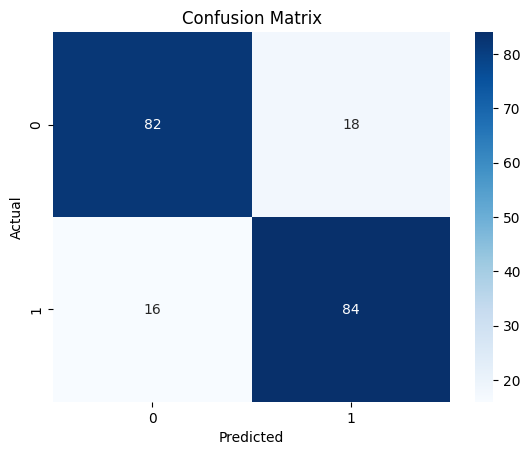

In [13]:
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## 6. Feature Importance

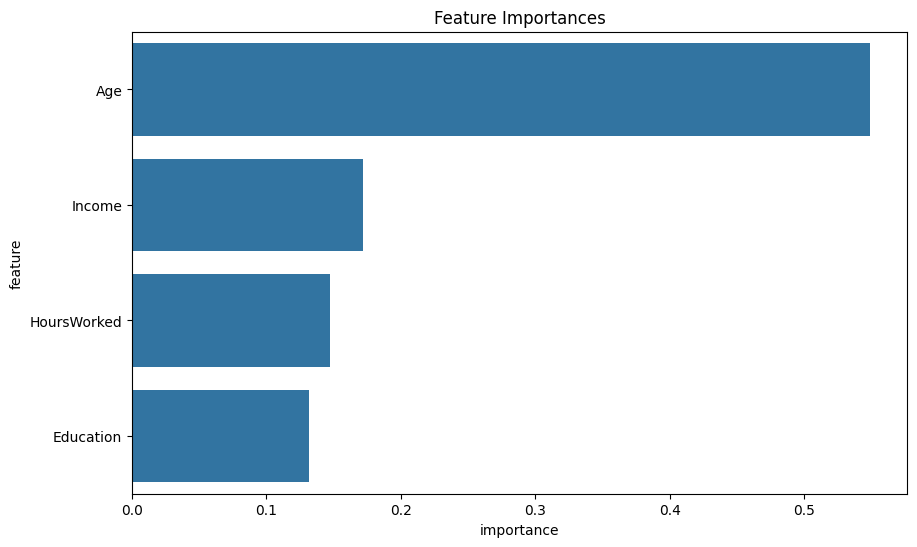

       feature  importance
0          Age    0.548948
1       Income    0.171895
3  HoursWorked    0.147236
2    Education    0.131922


In [14]:
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_df)
plt.title('Feature Importances')
plt.show()

print(feature_importance_df)

End of Analysis.